In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
!wget --no-check-certificate -nc 'https://docs.google.com/uc?export=download&id=1b24I621MoKU80mdZlhHMryvut0oFVbzk' -O poetry.txt


--2022-04-23 18:37:45--  https://docs.google.com/uc?export=download&id=1b24I621MoKU80mdZlhHMryvut0oFVbzk
Resolving docs.google.com (docs.google.com)... 108.177.127.138, 108.177.127.100, 108.177.127.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n38jb7uvhua002kco8u7pehmtc6m6ao1/1650739050000/08702983968081230261/*/1b24I621MoKU80mdZlhHMryvut0oFVbzk?e=download [following]
--2022-04-23 18:37:45--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n38jb7uvhua002kco8u7pehmtc6m6ao1/1650739050000/08702983968081230261/*/1b24I621MoKU80mdZlhHMryvut0oFVbzk?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs

In [3]:
tokenizer = Tokenizer()

data = open('poetry.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [4]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [5]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

#Creating the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(xs, ys, epochs=100, verbose=1)


Epoch 1/100
377/377 [==============================] - 11s 9ms/step - loss: 6.6496 - accuracy: 0.0746
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 5.7608 - accuracy: 0.1132
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 4.8359 - accuracy: 0.1680
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 3.9210 - accuracy: 0.2405
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 3.0637 - accuracy: 0.3422
Epoch 6/100
377/377 [==============================] - 5s 13ms/step - loss: 2.3995 - accuracy: 0.4556
Epoch 7/100
377/377 [==============================] - 5s 12ms/step - loss: 1.9267 - accuracy: 0.5422
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.5971 - accuracy: 0.6151
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.4114 - accuracy: 0.6606
Epoch 10/100
377/377 [==============================] - 4s 11ms/step - loss: 1.3044 - ac

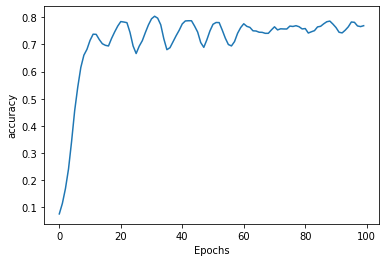

In [6]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')

In [9]:
seed_text = "I am feeling very happy today"
next_words = 10 #predicting next 100 words
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list),axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I am feeling very happy today is tears to smother hed the bridge of toome today
